In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from  sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss

In [35]:
data = pd.read_csv('gbm-data.csv')
y = data['Activity']
X = data.loc[:,'D1':]
Xa = np.array(X.values)
Ya = np.array(y.values)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(Xa, Ya, test_size=0.8, random_state=241)

      Iter       Train Loss   Remaining Time 
         1           1.2613           22.43s
         2           1.1715           18.86s
         3           1.1009           18.37s
         4           1.0529           19.66s
         5           1.0130           18.66s
         6           0.9740           19.52s
         7           0.9475           19.03s
         8           0.9197           18.49s
         9           0.8979           17.70s
        10           0.8730           18.09s
        20           0.7207           15.97s
        30           0.6055           16.14s
        40           0.5244           14.76s
        50           0.4501           13.72s
        60           0.3908           12.75s
        70           0.3372           11.89s
        80           0.3009           11.11s
        90           0.2603           10.31s
       100           0.2327            9.64s
       200           0.0835            3.21s


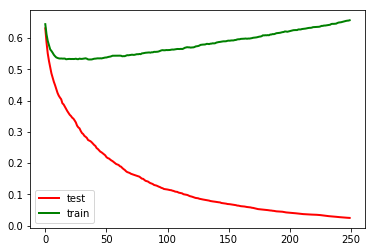

In [46]:

train_a = []*5
test_a = []*5

for i in [0.2]:
    clf = GradientBoostingClassifier(n_estimators=250, random_state=241, verbose=True, learning_rate=i)
    clf.fit(X_train,y_train)
    train = [log_loss(y_train, 1/(1+np.exp(-y_pred))) for y_pred in clf.staged_decision_function(X_train)]
    test = [log_loss(y_test, 1/(1+np.exp(-y_pred))) for y_pred in clf.staged_decision_function(X_test)]
    
    %matplotlib inline
    plt.figure()
    plt.plot(train, 'r', linewidth=2)
    plt.plot(test, 'g', linewidth=2)
    plt.legend(['test', 'train'])
    


In [48]:
#task 2
min_value = min(test)
print(min_value)
for i in range(len(test)):
    if test[i]==min_value:
        print(i)

0.531094637596885


In [60]:
clf = RandomForestClassifier(random_state=241, n_estimators=37)
clf.fit(X_train, y_train)

train = log_loss(y_test, clf.predict_proba(X_test))
print(train)

0.5410941951182815
